
# <center> Code 3: Profiling USEPs with socioeconomic indicators </center>

<br/>

<div style="text-align: center;font-size: 90%;">
    Bruno Dias dos Santos<sup><a href="https://orcid.org/0000-0001-6181-2158"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup><sup><a href="https://orcid.org/0000-0002-0082-9498"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Graduate Program in Remote Sensing, National Institute for Space Research (INPE)
    <br/>
    1758, Avenida dos Astronautas, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <div><a href="mailto:bruno.santos@inpe.br">bruno.santos@inpe.br</a></div>
    <br/><br/>
</div>
<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b>  This Notebook presents the methodology for profiling Urban and Socio-Environmental Patterns (USEPs) with socioeconomic indicators. This notebook should be executed after Code 2.
</div>    

<br/>

Importing libraries:

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score,classification_report,confusion_matrix
from sklearn import tree

Reading the USEPs and socioeconomic indicators shapefiles and creating GeoDataFrames:

In [31]:
useps = gpd.read_file("urban_socio_environmental_patterns/useps_santarem.shp")

In [32]:
useps

,ID,AGSN,Area,C_ENV,C_URB,Situation,USEPs,Name,geometry
0,1,No,Unoccupied,0.0,NaN,None,NaN,Unoccupied,"POLYGON ((752288.177 9722818.283, 752288.612 9..."
1,2,No,Unoccupied,0.0,NaN,None,NaN,Unoccupied,"POLYGON ((752388.360 9722817.848, 752388.795 9..."
2,3,No,Unoccupied,0.0,NaN,None,NaN,Unoccupied,"POLYGON ((752488.544 9722817.414, 752488.978 9..."
3,4,No,Unoccupied,0.0,NaN,None,NaN,Unoccupied,"POLYGON ((752588.727 9722816.980, 752589.162 9..."
4,5,No,Occupied,0.0,0.0,Old urban,5.0,Main roads,"POLYGON ((752688.911 9722816.546, 752689.345 9..."
...,...,...,...,...,...,...,...,...,...
14650,14651,No,Unoccupied,5.0,NaN,None,NaN,Unoccupied,"POLYGON ((752435.786 9733807.561, 752436.214 9..."
14651,14652,No,Unoccupied,5.0,NaN,None,NaN,Unoccupied,"POLYGON ((752535.942 9733807.133, 752536.369 9..."
14652,14653,No,Unoccupied,5.0,NaN,None,NaN,Unoccupied,"POLYGON ((752636.097 9733806.706, 752636.525 9..."
14653,14654,No,Unoccupied,5.0,NaN,None,NaN,Unoccupied,"POLYGON ((752736.253 9733806.280, 752736.680 9..."


In [33]:
indicators = gpd.read_file("socioeconomical_dimension/indicators_santarem.shp")

In [34]:
indicators

,ID,avg_inv_ho,p_per_hous,dr_15,dr_65,sex_ratio,literacy,inad_sewag,inad_water,inap_waste,geometry
0,5,5346.224208,2.786641,0.242406,0.000000,1.183136,1.021059,4.254414,89.342693,0.000000,"POLYGON ((752688.911 9722816.546, 752689.345 9..."
1,6,5346.224208,2.786641,0.242406,0.000000,1.183136,1.021059,4.254414,89.342693,0.000000,"POLYGON ((752789.095 9722816.113, 752789.529 9..."
2,10,5346.224208,2.786641,0.242406,0.000000,1.183136,1.021059,4.254414,89.342693,0.000000,"POLYGON ((753189.831 9722814.381, 753190.263 9..."
3,11,5346.224208,2.786641,0.242406,0.000000,1.183136,1.021059,4.254414,89.342693,0.000000,"POLYGON ((753290.015 9722813.949, 753290.447 9..."
4,12,5346.224208,2.786641,0.242406,0.000000,1.183136,1.021059,4.254414,89.342693,0.000000,"POLYGON ((753390.199 9722813.517, 753390.631 9..."
...,...,...,...,...,...,...,...,...,...,...,...
6296,14338,666.269750,4.274483,0.323209,0.087498,1.196032,0.854897,97.702465,84.726357,7.633005,"POLYGON ((751430.790 9733012.497, 751431.221 9..."
6297,14339,666.269750,4.274483,0.323209,0.087498,1.196032,0.854897,97.702465,84.726357,7.633005,"POLYGON ((751530.947 9733012.067, 751531.377 9..."
6298,14340,666.269750,4.274483,0.323209,0.087498,1.196032,0.854897,97.702465,84.726357,7.633005,"POLYGON ((751631.104 9733011.636, 751631.534 9..."
6299,14392,666.269750,4.274483,0.323209,0.087498,1.196032,0.854897,97.702465,84.726357,7.633005,"POLYGON ((751230.907 9733113.276, 751231.338 9..."


Merging both GeoDataframes:

In [35]:
useps =  useps[['ID','USEPs']].merge(indicators, left_on='ID', right_on = 'ID')

In [36]:
useps

,ID,USEPs,avg_inv_ho,p_per_hous,dr_15,dr_65,sex_ratio,literacy,inad_sewag,inad_water,inap_waste,geometry
0,5,5.0,5346.224208,2.786641,0.242406,0.000000,1.183136,1.021059,4.254414,89.342693,0.000000,"POLYGON ((752688.911 9722816.546, 752689.345 9..."
1,6,5.0,5346.224208,2.786641,0.242406,0.000000,1.183136,1.021059,4.254414,89.342693,0.000000,"POLYGON ((752789.095 9722816.113, 752789.529 9..."
2,10,3.0,5346.224208,2.786641,0.242406,0.000000,1.183136,1.021059,4.254414,89.342693,0.000000,"POLYGON ((753189.831 9722814.381, 753190.263 9..."
3,11,3.0,5346.224208,2.786641,0.242406,0.000000,1.183136,1.021059,4.254414,89.342693,0.000000,"POLYGON ((753290.015 9722813.949, 753290.447 9..."
4,12,3.0,5346.224208,2.786641,0.242406,0.000000,1.183136,1.021059,4.254414,89.342693,0.000000,"POLYGON ((753390.199 9722813.517, 753390.631 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6296,14338,1.0,666.269750,4.274483,0.323209,0.087498,1.196032,0.854897,97.702465,84.726357,7.633005,"POLYGON ((751430.790 9733012.497, 751431.221 9..."
6297,14339,1.0,666.269750,4.274483,0.323209,0.087498,1.196032,0.854897,97.702465,84.726357,7.633005,"POLYGON ((751530.947 9733012.067, 751531.377 9..."
6298,14340,1.0,666.269750,4.274483,0.323209,0.087498,1.196032,0.854897,97.702465,84.726357,7.633005,"POLYGON ((751631.104 9733011.636, 751631.534 9..."
6299,14392,1.0,666.269750,4.274483,0.323209,0.087498,1.196032,0.854897,97.702465,84.726357,7.633005,"POLYGON ((751230.907 9733113.276, 751231.338 9..."


Filling in possible null values and rounding the indicators:

In [37]:
dummy = 0

useps.iloc[:,2:-1] = useps.iloc[:,2:-1].fillna(dummy)
useps.iloc[:,2:-1] = useps.iloc[:,2:-1].round(3)

useps.iloc[:,2:-1]

,avg_inv_ho,p_per_hous,dr_15,dr_65,sex_ratio,literacy,inad_sewag,inad_water,inap_waste
0,5346.224,2.787,0.242,0.000,1.183,1.021,4.254,89.343,0.000
1,5346.224,2.787,0.242,0.000,1.183,1.021,4.254,89.343,0.000
2,5346.224,2.787,0.242,0.000,1.183,1.021,4.254,89.343,0.000
3,5346.224,2.787,0.242,0.000,1.183,1.021,4.254,89.343,0.000
4,5346.224,2.787,0.242,0.000,1.183,1.021,4.254,89.343,0.000
...,...,...,...,...,...,...,...,...,...
6296,666.270,4.274,0.323,0.087,1.196,0.855,97.702,84.726,7.633
6297,666.270,4.274,0.323,0.087,1.196,0.855,97.702,84.726,7.633
6298,666.270,4.274,0.323,0.087,1.196,0.855,97.702,84.726,7.633
6299,666.270,4.274,0.323,0.087,1.196,0.855,97.702,84.726,7.633


We used the 2010 census to calculate the socioeconomic indicators. Due to the Covid-19 pandemic, the most recent and available demographic census data in Brazil is from 2010. Because of this, specifically for Santarém, it was necessary to exclude 'USEP 7 - Housing complex' from the socioeconomic analysis, as this is a new urban pattern created after 2010. We also excluded 'USEP 1 - Riverside' and 'USEP 5 - Main roads' from the analysis, as both comprise especially the access and uninhabited areas, referring respectively to the river and the roads.

If you are running the data from Cametá, ignore the next cell (16): 

In [38]:
#Applied for Santarém

index_names = useps[(useps['USEPs'] == 1) | (useps['USEPs'] == 5) | (useps['USEPs'] == 7)].index
useps.drop(index_names, inplace = True)

useps

,ID,USEPs,avg_inv_ho,p_per_hous,dr_15,dr_65,sex_ratio,literacy,inad_sewag,inad_water,inap_waste,geometry
2,10,3.0,5346.224,2.787,0.242,0.000,1.183,1.021,4.254,89.343,0.000,"POLYGON ((753189.831 9722814.381, 753190.263 9..."
3,11,3.0,5346.224,2.787,0.242,0.000,1.183,1.021,4.254,89.343,0.000,"POLYGON ((753290.015 9722813.949, 753290.447 9..."
4,12,3.0,5346.224,2.787,0.242,0.000,1.183,1.021,4.254,89.343,0.000,"POLYGON ((753390.199 9722813.517, 753390.631 9..."
5,30,3.0,845.487,3.684,0.297,0.071,1.007,0.890,15.066,58.896,0.000,"POLYGON ((760603.631 9722783.078, 760604.045 9..."
6,31,3.0,845.487,3.684,0.297,0.071,1.007,0.890,15.066,58.896,0.000,"POLYGON ((760703.820 9722782.664, 760704.234 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6272,14189,4.0,5159.537,3.342,0.166,0.122,0.749,0.989,93.547,1.375,0.035,"POLYGON ((754334.099 9732700.362, 754334.522 9..."
6278,14220,2.0,1055.031,4.307,0.308,0.086,1.150,0.868,84.076,70.819,6.275,"POLYGON ((751329.771 9732813.093, 751330.202 9..."
6279,14221,6.0,1549.602,4.349,0.289,0.084,1.092,0.885,66.740,53.126,4.547,"POLYGON ((751429.928 9732812.662, 751430.359 9..."
6280,14222,6.0,2023.117,4.303,0.271,0.088,1.012,0.905,50.222,39.351,3.316,"POLYGON ((751530.086 9732812.231, 751530.516 9..."


Plotting bloxpots of socioeconomic indicators versus urban patterns: 

In [26]:
# Collor palletes 

# for Santarém:
# paleta = ['#ABD34A','#2A8123','#AFAFAF','#D4BC9B']

# for Cametá:
# paleta = ['#1FBFDC','#D8D24A','#2A8123','#AFAFAF','#F04966','#FAFAE1','#AB9B67','#F2BBDE']

In [39]:
#paleta = ['#1FBFDC','#D8D24A','#2A8123','#AFAFAF','#F04966','#FAFAE1','#AB9B67','#F2BBDE']
paleta = ['#ABD34A','#2A8123','#AFAFAF','#D4BC9B']

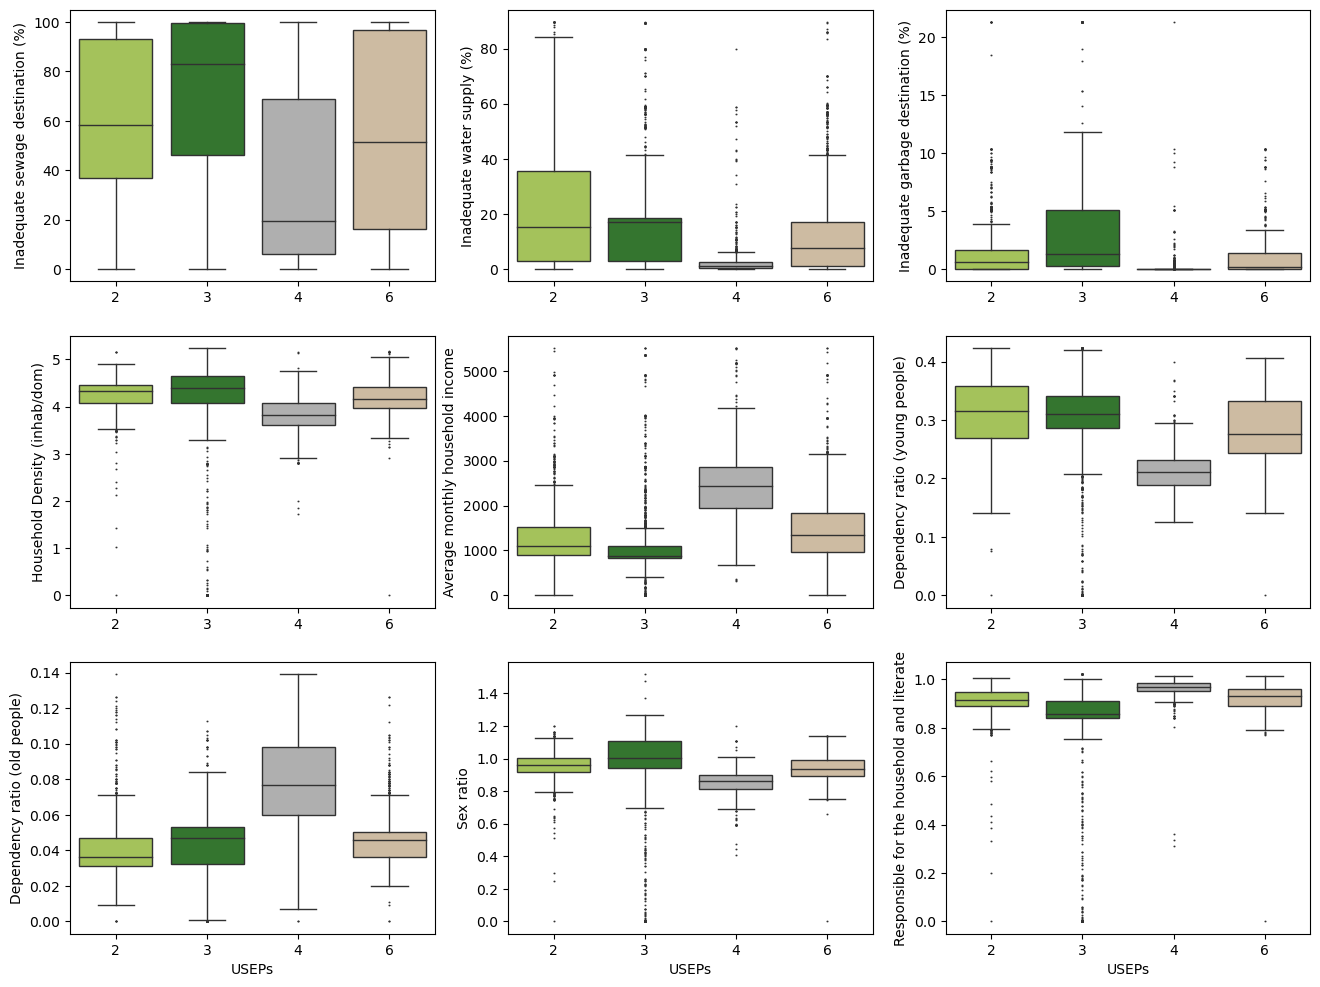

In [40]:
fig, axes = plt.subplots(3,3, figsize=(16, 12))

sns.boxplot(ax=axes[0,0], x='USEPs', y= useps['inad_sewag'],  
            linewidth = 1,palette = paleta, fliersize = 0.5, data = useps).set(ylabel='Inadequate sewage destination (%)', xlabel= None)
axes[0,0].set_xticklabels(['2','3','4','6'])

sns.boxplot(ax=axes[0,1], x='USEPs', y= useps['inad_water'],  
            linewidth = 1,palette = paleta, fliersize = 0.5, data = useps).set(ylabel='Inadequate water supply (%)', xlabel= None)
axes[0,1].set_xticklabels(['2','3','4','6'])

sns.boxplot(ax=axes[0,2],x='USEPs', y= useps['inap_waste'],  
            linewidth = 1,palette = paleta, fliersize = 0.5, data = useps).set(ylabel='Inadequate garbage destination (%)', xlabel= None)
axes[0,2].set_xticklabels(['2','3','4','6'])

sns.boxplot(ax=axes[1,0], x='USEPs', y= useps['p_per_hous'],
            linewidth = 1,palette = paleta, fliersize = 0.5, data = useps).set(ylabel='Household Density (inhab/dom)', xlabel= None)
axes[1,0].set_xticklabels(['2','3','4','6'])

sns.boxplot(ax=axes[1,1], x='USEPs', y= useps['avg_inv_ho'], 
            linewidth = 1,palette = paleta, fliersize = 0.5, data = useps).set(ylabel='Average monthly household income', xlabel= None)
axes[1,1].set_xticklabels(['2','3','4','6'])


sns.boxplot(ax=axes[1,2], x='USEPs', y= useps['dr_15'], linewidth = 1,palette = paleta, fliersize = 0.5, data = useps).set(ylabel='Dependency ratio (young people)', xlabel= None)
axes[1,2].set_xticklabels(['2','3','4','6'])

sns.boxplot(ax=axes[2,0], x='USEPs', y= useps['dr_65'],  
            linewidth = 1,palette = paleta, fliersize = 0.5, data = useps).set(ylabel='Dependency ratio (old people)', xlabel='USEPs')
axes[2,0].set_xticklabels(['2','3','4','6'])

sns.boxplot(ax=axes[2,1],x='USEPs', y= useps['sex_ratio'], 
            linewidth = 1,palette = paleta, fliersize = 0.5, data = useps).set(ylabel='Sex ratio', xlabel='USEPs')
axes[2,1].set_xticklabels(['2','3','4','6'])

sns.boxplot(ax=axes[2,2],x='USEPs', y= useps['literacy'],
            linewidth = 1,palette = paleta, fliersize = 0.5, data = useps).set(ylabel='Responsible for the household and literate', xlabel='USEPs')
axes[2,2].set_xticklabels(['2','3','4','6'])

plt.show()

Selecting the data to apply to profile the clusters using a decision tree:

In [43]:
X = pd.DataFrame(useps.iloc[:,2:-1])
Y = pd.DataFrame(useps['USEPs']).to_numpy()

Splitting the data between training and testing data:

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, stratify = Y, random_state=42)

Selection of hyperparameters and values for GridSearchCV. In this technique, several hyperparameters and many values are selected to be tried. The algorithm evaluates all possible combinations between the different hyperparameter values, using cross-validation and a performance measure. Grid Search uses cross-validation, dividing the training base into k parts (folds), and the model is trained and evaluated k times. For each iteration, the algorithm selects a part (fold) that will serve as an evaluation and trains the model on the other k -1 parts. 

In [49]:
parametros = {'criterion':['gini','entropy','log_loss'],
              'splitter':['best','random'],
              'max_depth':[3,4],
              'min_samples_split':[5,10,20,30, None],
              'min_samples_leaf': [5,10,20,30, None]
             }

In [50]:
modelo = GridSearchCV(estimator = DecisionTreeClassifier(), verbose=2, param_grid = parametros, scoring='accuracy', n_jobs=-1, cv=5)

Designing the Decision tree classification model:

In [51]:
modelo.fit(x_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


c:\Users\brdia\anaconda3\envs\environment\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\brdia\anaconda3\envs\environment\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\brdia\anaconda3\envs\environment\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "c:\Users\brdia\anaconda3\envs\environment\lib\site-packages\sklearn\tree\_classes.py", line 273, in fit
    check_scalar(
  File "c:\Us

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4],
                         'min_samples_leaf': [5, 10, 20, 30, None],
                         'min_samples_split': [5, 10, 20, 30, None],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

Visualizing the best combination of hyperparameters: 

In [57]:
modelo.best_score_

0.6184615384615385

In [54]:
modelo.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'splitter': 'best'}

In [56]:
modelo.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=5)

Using the trained model to predict the validation database:

In [58]:
y_pred = modelo.predict(x_test)

Viewing the most used variables in the Decision tree model:

<BarContainer object of 9 artists>

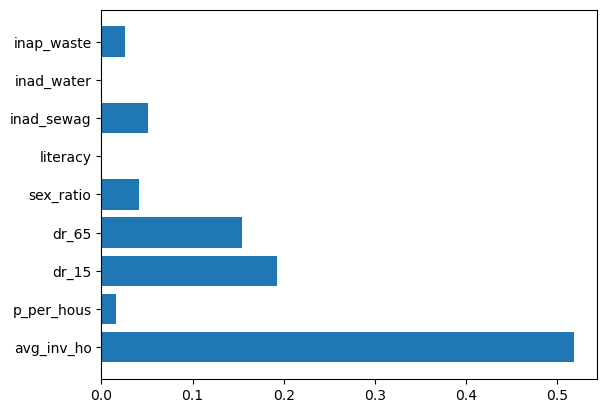

In [59]:
plt.barh(x_test.columns, modelo.best_estimator_.feature_importances_ )

Viewing performance metrics of the classification model:

In [79]:
macro = f1_score(y_test, y_pred, average = 'macro')
wei = f1_score(y_test, y_pred, average = 'weighted')
accuracy = accuracy_score(y_test, y_pred)

results = {'F1_Score_Macro': macro,
             'F1_Score_Weighted': wei,
             'Global Acuraccy': accuracy 
            }

pd.DataFrame.from_dict(results, orient='index', dtype=None, columns=['Metrics'])

,Metrics
F1_Score_Macro,0.597819
F1_Score_Weighted,0.634831
Global Acuraccy,0.628295


Confusion matrix:

In [61]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 95  38  14  56]
 [ 89 390   3  49]
 [  2   8  96  40]
 [ 49  59  16 134]]
              precision    recall  f1-score   support

         2.0       0.40      0.47      0.43       203
         3.0       0.79      0.73      0.76       531
         4.0       0.74      0.66      0.70       146
         6.0       0.48      0.52      0.50       258

    accuracy                           0.63      1138
   macro avg       0.60      0.59      0.60      1138
weighted avg       0.64      0.63      0.63      1138



Exporting the txt with classification information:

In [65]:
################ Update the file name  
path = "socioeconomical_dimension/santarem_socioeconomic_decision_tree.txt"

################

infos = open(path,"w",encoding='utf-8')

list_informations = []
list_informations.append((str(modelo.best_params_)))
list_informations.append((str(results)))

for line in list_informations:
    infos.write(line)
    infos.write('\n')
    
print(classification_report(y_test, y_pred), file = infos)
print(confusion_matrix(y_test, y_pred), file = infos)

infos.close()

Viewing the decision tree:

In [66]:
clf = modelo.best_estimator_

In [67]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 31 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 0] <= 1207.4099731445312 else to node 16.
	node=1 is a split node: go to node 2 if X[:, 3] <= 0.04450000077486038 else to node 9.
		node=2 is a split node: go to node 3 if X[:, 0] <= 757.927001953125 else to node 6.
			node=3 is a split node: go to node 4 if X[:, 6] <= 98.78199768066406 else to node 5.
				node=4 is a leaf node.
				node=5 is a leaf node.
			node=6 is a split node: go to node 7 if X[:, 6] <= 28.700499534606934 else to node 8.
				node=7 is a leaf node.
				node=8 is a leaf node.
		node=9 is a split node: go to node 10 if X[:, 3] <= 0.05250000022351742 else to node 13.
			node=10 is a split node: go to node 11 if X[:, 0] <= 863.5020141601562 else to node 12.
				node=11 is a leaf node.
				node=12 is a leaf node.
			node=13 is a split node: go to node 14 if X[:, 2] <= 0.27699999511241913 else to node 15.
				node=14 is a leaf node.
				node=15 is a 

In [74]:
target = []
cont = 0

for classe in useps['USEPs'].unique():
    if not pd.isnull(classe):
        target.append(str(classe))

target

['3.0', '2.0', '4.0', '6.0']

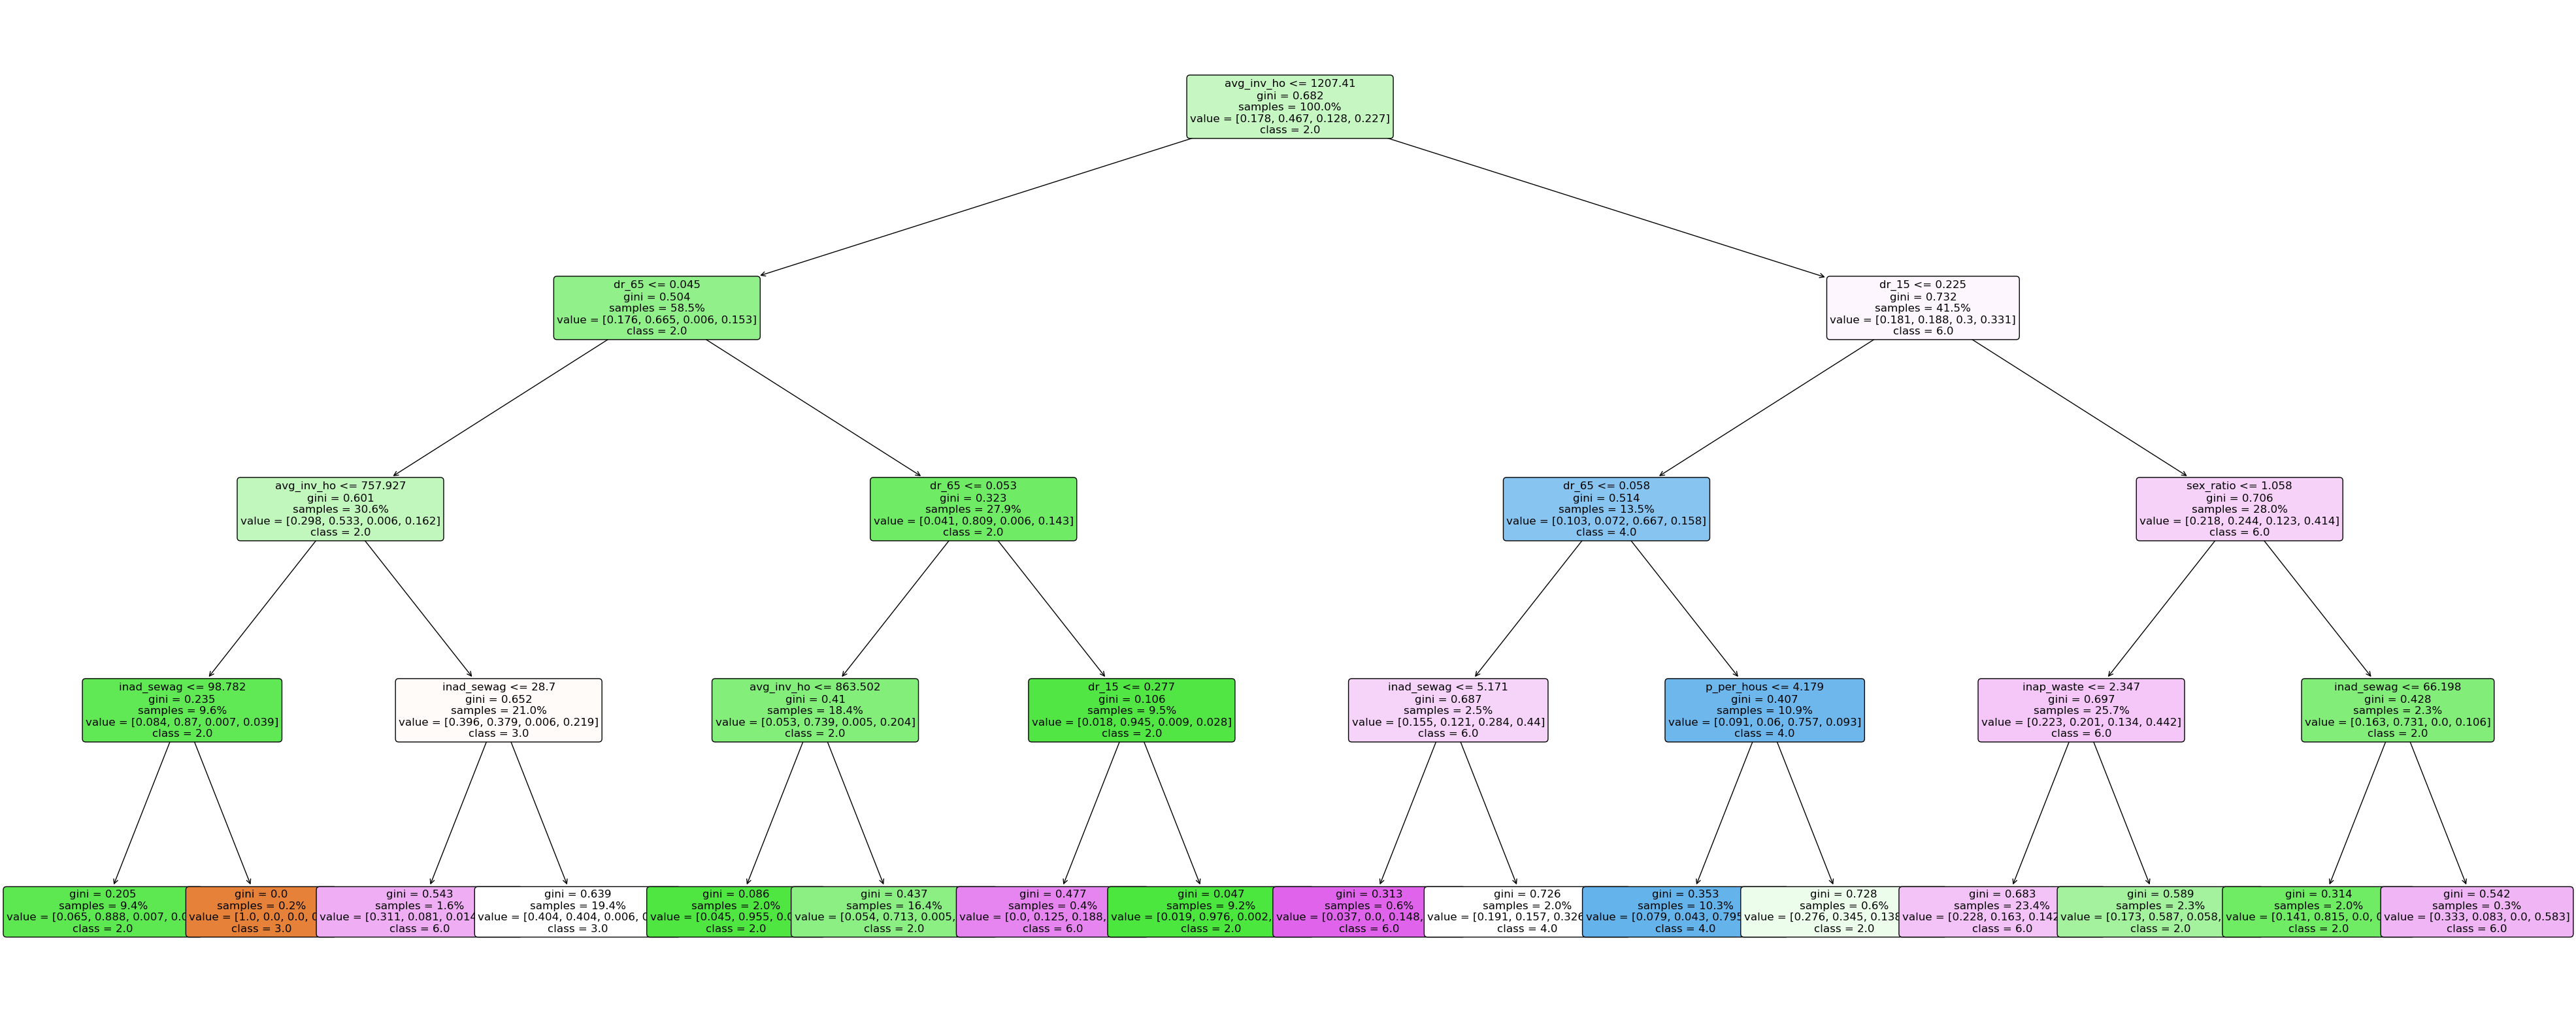

In [75]:
plt_1 = plt.figure(figsize=(50,20))

tree.plot_tree(clf, fontsize=12,proportion = 1, precision = 3, feature_names = list(useps.iloc[:,2:-1].columns),  
                      class_names = target, filled = 1, rounded=True)
plt.show()

Exporting an excel with the indicators:

In [78]:
useps.to_excel("socioeconomical_dimension/useps_santarem_indicators.xlsx")